# Quick Look Tools 
former Notebook for testing showCamera.
Initially written by Michael Reuter.\
Modified by Johnny Esteves - 18-Mar-22\
Modified by Craig Lage - 13-Jan-22\
Testing with comCam data from 2021-09-23.

In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import lsst.afw.cameraGeom.utils as camGeomUtils
import lsst.afw.display as afwDisplay
import lsst.daf.butler as dafButler #Gen3 butler

In [2]:
def myCallback(im, ccd, imageSource):
    """Assemble the CCD image.  Just bias subtraction and gain correction"""
    oim = camGeomUtils.rawCallback(im, ccd, imageSource,
                                   subtractBias=False, correctGain=False)
    return oim

In [3]:
# Instantiate the Gen3 butler
dataPath = "/repo/main"
instrument = "LATISS"
obsDate = 20210311
butler = dafButler.Butler(dataPath, 
                          collections=["LATISS/raw/all", "LATISS/calib/unbounded",f"u/jesteves/calib/latiss/dark_{obsDate}",f"u/jesteves/calib/latiss/bias_{obsDate}"],
                          instrument=instrument)

Failed to instantiate Butler from config file:///sdf/group/rubin/repo/main/butler.yaml.


OperationalError: (psycopg2.OperationalError) connection to server at "usdf-butler.slac.stanford.edu" (134.79.23.203), port 5432 failed: FATAL:  no such user
connection to server at "usdf-butler.slac.stanford.edu" (134.79.23.203), port 5432 failed: FATAL:  no such user

(Background on this error at: https://sqlalche.me/e/14/e3q8)

In [4]:
repo = '/repo/main/butler.yaml'
collection = f'u/jesteves/latiss/flat_RG610_{obsDate}'
print('repo: %s'%repo)
print('collection:%s \n'%collection)

subbutler = dafButler.Butler(repo,collections=collection)

# subregistry = subbutler.registry
bias = subbutler.get('flat',instrument=instrument,detector=0,physical_filter='RG610~empty')
# bias = subbutler.get('bias',instrument=instrument,detector=0)

Failed to instantiate Butler from config file:///repo/main/butler.yaml.


repo: /repo/main/butler.yaml
collection:u/jesteves/latiss/flat_RG610_20210311 



OperationalError: (psycopg2.OperationalError) connection to server at "usdf-butler.slac.stanford.edu" (134.79.23.203), port 5432 failed: FATAL:  no such user
connection to server at "usdf-butler.slac.stanford.edu" (134.79.23.203), port 5432 failed: FATAL:  no such user

(Background on this error at: https://sqlalche.me/e/14/e3q8)

In [63]:
def get_lims(arr):
    v1,v3 = np.nanpercentile(arr,[25,75])
    iqr = (v3-v1)/2
    vlow, vhig = v1-1.5*iqr, v3+1.5*iqr
    return vlow, vhig

In [64]:
vlow, vhig = get_lims(bias.image.array.flatten())
print('limits; low, high = %.2f, %.2f'%(vlow,vhig))

if vlow<0.: vlow=1.

limits; low, high = 0.96, 1.04


Text(0.5, 1.0, 'Flat 20210311')

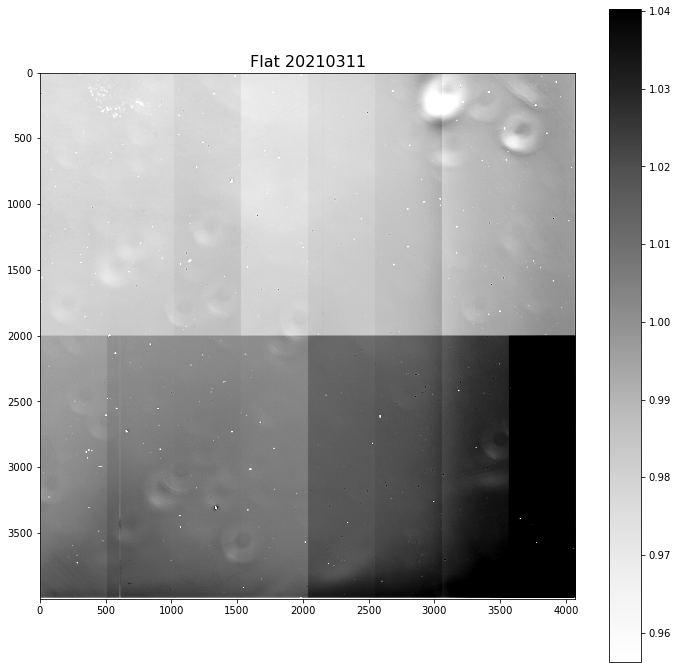

In [65]:
import matplotlib.colors as colors
plt.figure(figsize=(12,12))
# plt.imshow(bias.image.array,norm=colors.LogNorm(vmin=vlow,vmax=vhig),cmap='Greys')
plt.imshow(bias.image.array,vmin=vlow,vmax=vhig,cmap='Greys')

plt.colorbar()
plt.title(f'Flat {obsDate}',fontsize=16)
# plt.savefig(f'../flat_{obsDate}.png',facecolor='w',trasnparent=False)

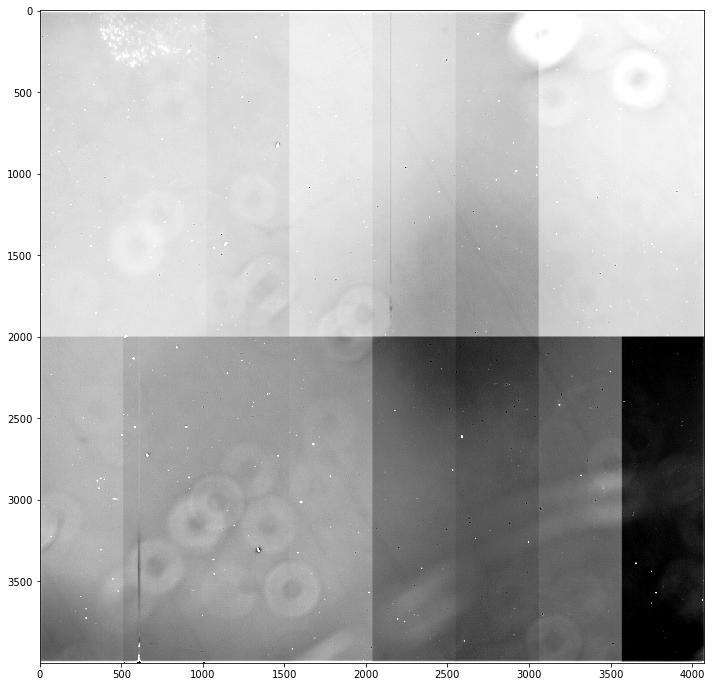

In [49]:
plt.figure(figsize=(12,12))
plt.imshow(bias.image.array,vmin=np.percentile(bias.image.array,2),vmax=np.percentile(bias.image.array,98),cmap='Greys')
# plt.colorbar()

In [25]:
day_obs = obsDate
seq_num = 15

dataId = {"instrument": instrument, "exposure.day_obs": day_obs, "exposure.seq_num": seq_num}

In [26]:
# camera has the info necessary to assemble the 9 CCDs
camera = butler.get('camera', instrument=instrument)
# Print the metadata just as a check.
metadata = butler.get('raw.visitInfo', {**dataId, "detector.id": 0})
print(metadata)

VisitInfo(exposureId=2022030400015, exposureTime=30, darkTime=30.2539, date=2022-03-04T14:41:23.119490361, UT1=nan, ERA=0.388348 rad, boresightRaDec=(nan, +nan), boresightAzAlt=(205.6981533065, +38.9740793987), boresightAirmass=nan, boresightRotAngle=5.00682 rad, rotType=0, observatory=-30.2446N, -70.7494E  2663, weather=Weather(nan, nan, nan), instrumentLabel='LATISS', id=2022030400015)


In [27]:
# Print out mean and sigma for each detector
# This is before bias subtraction and gain adjustment.
for det in range(1):
    exp = butler.get('dark', {**dataId, "detector.id": det})
    arr = arr = exp.image.array
    print(det, arr.min(), arr.max(), arr.mean(), arr.std())

0 -3542.848 1284191.8 51.537476 6371.146


In [30]:
# Instantiate the firefly display.
# This should open a new tab with Firefly
disp = afwDisplay.Display(0, "firefly")

In [29]:
# This is bias subtracted and gain adjusted (see myCallback above), so gives a decent image.
# Note that it is only ~ 200-300 counts after bias subtraction
disp.scale('asinh', 'zscale')

dataType='dark' # 'raw' will look at the raw image, 'bias' looks at the master bias
mos = camGeomUtils.showCamera(camera,
                              camGeomUtils.ButlerImage(butler, dataType, 
                                                       instrument=instrument,
                                                       day_obs=day_obs, seq_num=seq_num,
                                                       verbose=True, callback=None,
                                                       background=np.nan),
                              binSize=1, display=disp, overlay=False,
                              title="%d %d %s" % (day_obs, seq_num, dataType))

In [29]:
dataPath = "/repo/main"
instrument = "LATISS"
obsDate = 20210708
butler = dafButler.Butler(dataPath, collections=["LATISS/raw/all", "LATISS/calib/unbounded",f"u/jesteves/calib/latiss/flat_{obsDate}_rerun"],)
exp = butler.get('camera', instrument=instrument)

In [30]:
exp.image.array

AttributeError: 'lsst.afw.cameraGeom._cameraGeom.Camera' object has no attribute 'image'

In [23]:
# Gen3 butler
# from lsst.daf.butler import Butler
import lsst.daf.butler as dafButler

dayObs = '2021-07-08'
dayObs = int(dayObs.replace('-', ''))

# Instantiate the Gen3 butler
dataPath = "/repo/main"
instrument = "LATISS"
obsDate = 20210708
butler = dafButler.Butler(dataPath, 
                          collections=["LATISS/raw/all", "LATISS/calib/unbounded",f"u/jesteves/calib/latiss/flat_{obsDate}_rerun"],
                          instrument=instrument)

day_obs = obsDate
seq_num = 70
dataId = {"instrument": instrument, "exposure.day_obs": day_obs, "exposure.seq_num": seq_num}

# camera has the info necessary to assemble the 9 CCDs
camera = butler.get('camera', instrument=instrument)
# Print the metadata just as a check.
metadata = butler.get('raw.visitInfo', {**dataId, "detector.id": 0})
print(metadata)

# This is bias subtracted and gain adjusted (see myCallback above), so gives a decent image.
# Note that it is only ~ 200-300 counts after bias subtraction
disp.scale('asinh', 'zscale')

dataType='flat' # 'raw' will look at the raw image, 'bias' looks at the master bias
mos = camGeomUtils.showCamera(camera,
                              camGeomUtils.ButlerImage(butler, dataType, 
                                                       instrument=instrument,
                                                       day_obs=day_obs, seq_num=seq_num,
                                                       verbose=True, callback=None,
                                                       background=np.nan),
                              binSize=1, display=disp, overlay=False,
                              title="%d %d %s" % (day_obs, seq_num, dataType))

# # Print out mean and sigma for each detector
# # This is before bias subtraction and gain adjustment.
# for det in range(1):
#     exp = butler.get('dark', {**dataId, "detector.id": det})
#     arr = arr = exp.image.array
#     print(det, arr.min(), arr.max(), arr.mean(), arr.std())
    
    
# exposureList = []
# for record in butler.registry.queryDimensionRecords("exposure", where="exposure.day_obs=%d"%dayObs):
#     exposureList.append([record.id, record])
# exposureList.sort(key=lambda x: x[0])
# for [id,record] in exposureList:
#     print(record.id, record.observation_type, record.exposure_time, record.physical_filter, record.target_name)

VisitInfo(exposureId=2021070800070, exposureTime=2, darkTime=2.24942, date=2021-07-08T21:52:56.521945562, UT1=nan, ERA=4.44838 rad, boresightRaDec=(nan, +nan), boresightAzAlt=(205.6988368228, +38.9979903980), boresightAirmass=nan, boresightRotAngle=0.635963 rad, rotType=0, observatory=-70.7494W, -30.2446N  2663, weather=Weather(nan, nan, nan), instrumentLabel='LATISS', id=2021070800070)


/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-0.7.0/Linux64/obs_base/22.0.1-29-ge050cc6+6e21b5568a/python/lsst/obs/base/formatters/fitsExposure.py:636: UserWarning: Reading file:///repo/main/u/jesteves/latiss/flat_20210708_rerun/20220121T150003Z/flat/white/empty~empty/flat_LATISS_white_empty~empty_RXX_S00_u_jesteves_latiss_flat_20210708_rerun_20220121T150003Z.fits with data ID {instrument: 'LATISS', detector: 0, physical_filter: 'empty~empty', ...}: filter label mismatch (file is None, data ID is FilterLabel(band="white", physical="empty~empty")).  This is probably a bug in the code that produced it.
  warnings.warn(f"Reading {self.fileDescriptor.location} with data ID {self.dataId}: "


In [24]:
fname='file:///repo/main/u/jesteves/latiss/flat_20210708_rerun/20220121T150003Z/flat/white/empty~empty/flat_LATISS_white_empty~empty_RXX_S00_u_jesteves_latiss_flat_20210708_rerun_20220121T150003Z.fits'

# Check The Log of a Night Run

In [6]:
# Gen3 butler
# from lsst.daf.butler import Butler
import lsst.daf.butler as dafButler

dayObs = '2022-03-17'
dayObs = int(dayObs.replace('-', ''))

# Instantiate the Gen3 butler
dataPath = "/repo/main"
instrument = "LATISS"
obsDate = 20210708
butler = dafButler.Butler(dataPath, 
                          collections=["LATISS/raw/all", "LATISS/calib/unbounded",f"u/jesteves/calib/latiss/bias_{obsDate}"],
                          instrument=instrument)
exposureList = []
for record in butler.registry.queryDimensionRecords("exposure", where="exposure.day_obs=%d"%dayObs):
    exposureList.append([record.id, record])
exposureList.sort(key=lambda x: x[0])
for [id,record] in exposureList:
    print(record.id, record.observation_type, record.exposure_time, record.physical_filter, record.target_name)

In [40]:
# Gen3 butler
# from lsst.daf.butler import Butler
import lsst.daf.butler as dafButler

dayObs = '2022-03-17'
dayObs = int(dayObs.replace('-', ''))

# Instantiate the Gen3 butler
dataPath = "/repo/main"
instrument = "LATISS"
obsDate = 20210708
butler = dafButler.Butler(dataPath, 
                          collections=["LATISS/raw/all", "LATISS/calib/unbounded",f"u/jesteves/calib/latiss/bias_{obsDate}"],
                          instrument=instrument)
exposureList = []
for record in butler.registry.queryDimensionRecords("exposure", where="exposure.day_obs=%d"%dayObs):
    exposureList.append([record.id, record])
exposureList.sort(key=lambda x: x[0])
for [id,record] in exposureList:
    if record.observation_type=='flat':
        print(record.id, record.observation_type, record.exposure_time, record.physical_filter, record.target_name)

2022031700014 flat 10.0 SDSSg~holo4_003 FlatField position
2022031700015 flat 2.0 SDSSg~holo4_003 FlatField position
2022031700016 flat 2.0 SDSSg~holo4_003 FlatField position
2022031700022 flat 20.0 SDSSg~holo4_003 FlatField position
2022031700023 flat 2.0 SDSSg~holo4_003 FlatField position
2022031700104 flat 2.0 SDSSr~empty FlatField position
2022031700105 flat 2.0 SDSSr~empty FlatField position
2022031700106 flat 2.0 SDSSr~empty FlatField position
2022031700107 flat 2.0 SDSSr~empty FlatField position
2022031700108 flat 2.0 SDSSr~empty FlatField position
2022031700109 flat 2.0 SDSSr~empty FlatField position
2022031700110 flat 2.0 SDSSr~empty FlatField position
2022031700111 flat 2.0 SDSSr~empty FlatField position
2022031700112 flat 2.0 SDSSr~empty FlatField position
2022031700113 flat 2.0 SDSSr~empty FlatField position
2022031700114 flat 2.0 SDSSr~empty FlatField position
2022031700115 flat 2.0 SDSSr~empty FlatField position
2022031700116 flat 2.0 SDSSr~empty FlatField position
202203

In [13]:
# Gen3 butler
# from lsst.daf.butler import Butler
import lsst.daf.butler as dafButler

dayObs = '2021-06-09'
dayObs = int(dayObs.replace('-', ''))

# Instantiate the Gen3 butler
dataPath = "/repo/main"
instrument = "LATISS"
butler = dafButler.Butler(dataPath, 
                          collections=["LATISS/raw/all", "LATISS/calib/unbounded"],
                          instrument=instrument)
exposureList = []
for record in butler.registry.queryDimensionRecords("exposure", where="exposure.day_obs=%d"%dayObs):
    exposureList.append([record.id, record])
exposureList.sort(key=lambda x: x[0])
for [id,record] in exposureList:
    if record.observation_type=='flat':
        print(record.id, record.observation_type, record.exposure_time, record.physical_filter, record.target_name)

2021060900072 flat 2.0 RG610~empty FlatField position
2021060900073 flat 2.0 RG610~empty FlatField position
2021060900074 flat 2.0 RG610~empty FlatField position
2021060900075 flat 2.0 RG610~empty FlatField position
2021060900076 flat 2.0 RG610~empty FlatField position
2021060900077 flat 2.0 RG610~empty FlatField position
2021060900078 flat 2.0 RG610~empty FlatField position
2021060900079 flat 2.0 RG610~empty FlatField position
2021060900080 flat 2.0 RG610~empty FlatField position
2021060900081 flat 2.0 RG610~empty FlatField position
2021060900082 flat 0.2 RG610~empty FlatField position
2021060900083 flat 0.2 RG610~empty FlatField position
2021060900084 flat 0.4 RG610~empty FlatField position
2021060900085 flat 0.4 RG610~empty FlatField position
2021060900086 flat 0.6 RG610~empty FlatField position
2021060900087 flat 0.6 RG610~empty FlatField position
2021060900088 flat 0.8 RG610~empty FlatField position
2021060900089 flat 0.8 RG610~empty FlatField position
2021060900090 flat 1.0 RG610

In [60]:
# Gen3 butler
# from lsst.daf.butler import Butler
import lsst.daf.butler as dafButler

# dayObs = '2021-03-23' #ptc?
dayObs = '2021-03-11'
dayObs = int(dayObs.replace('-', ''))

# Instantiate the Gen3 butler
dataPath = "/repo/main"
instrument = "LATISS"
butler = dafButler.Butler(dataPath, 
                          collections=["LATISS/raw/all", "LATISS/calib/unbounded"],
                          instrument=instrument)
exposureList = []
for record in butler.registry.queryDimensionRecords("exposure", where="exposure.day_obs=%d"%dayObs):
    exposureList.append([record.id, record])
exposureList.sort(key=lambda x: x[0])
for [id,record] in exposureList:
    if record.observation_type=='flat':
        print(record.id, record.observation_type, record.exposure_time, record.physical_filter, record.target_name)

2021031100062 flat 2.0 RG610~empty FlatField position
2021031100063 flat 2.0 RG610~empty FlatField position
2021031100064 flat 2.0 RG610~empty FlatField position
2021031100065 flat 2.0 RG610~empty FlatField position
2021031100066 flat 2.0 RG610~empty FlatField position
2021031100067 flat 2.0 RG610~empty FlatField position
2021031100068 flat 2.0 RG610~empty FlatField position
2021031100069 flat 2.0 RG610~empty FlatField position
2021031100070 flat 2.0 RG610~empty FlatField position
2021031100071 flat 2.0 RG610~empty FlatField position
2021031100072 flat 0.2 empty~empty FlatField position
2021031100073 flat 0.2 empty~empty FlatField position
2021031100074 flat 0.4 empty~empty FlatField position
2021031100075 flat 0.4 empty~empty FlatField position
2021031100076 flat 0.6 empty~empty FlatField position
2021031100077 flat 0.6 empty~empty FlatField position
2021031100078 flat 0.8 empty~empty FlatField position
2021031100079 flat 0.8 empty~empty FlatField position
2021031100080 flat 1.0 empty

In [27]:
expId = 2021031100066
exposureList[61+4][1]

exposure.RecordClass(instrument='LATISS', id=2021031100066, physical_filter='RG610~empty', obs_id='AT_O_20210311_000066', exposure_time=2.0, dark_time=2.25752139091492, observation_type='flat', observation_reason='unknown', day_obs=20210311, seq_num=66, group_name='2021-03-11T22:31:54.817', group_id=1954315148170000, target_name='FlatField position', science_program='unknown', tracking_ra=None, tracking_dec=None, sky_angle=None, zenith_angle=50.9999970511562, timespan=Timespan(begin=astropy.time.Time('2021-03-11 22:32:13.400183', scale='tai', format='iso'), end=astropy.time.Time('2021-03-11 22:32:15.634000', scale='tai', format='iso')))

### Checking a Flat Field Image

In [28]:
record_i = exposureList[61][1]
day_obs = record_i.day_obs
seq_num = record_i.seq_num

dataId = {"instrument": instrument, "exposure.day_obs": day_obs, "exposure.seq_num": seq_num}

# camera has the info necessary to assemble the 9 CCDs
camera = butler.get('camera', instrument=instrument)
# Print the metadata just as a check.
metadata = butler.get('raw.visitInfo', {**dataId, "detector.id": 0})
print(metadata)

VisitInfo(exposureId=2021031100062, exposureTime=2, darkTime=2.32434, date=2021-03-11T22:31:56.237720128, UT1=nan, ERA=2.57194 rad, boresightRaDec=(nan, +nan), boresightAzAlt=(205.6986656084, +39.0000025018), boresightAirmass=nan, boresightRotAngle=-5.06145 rad, rotType=0, observatory=-30.2446N, -70.7494E  2663, weather=Weather(nan, nan, nan), instrumentLabel='LATISS', id=2021031100062)


In [30]:
# Print out mean and sigma for each detector
# This is before bias subtraction and gain adjustment.
for det in range(1):
    exp = butler.get('raw', {**dataId, "detector.id": det})
    arr = exp.image.array
    print(det, arr.min(), arr.max(), arr.mean(), arr.std())

0 10801.0 178775.0 63985.86 20099.055


limits; low, high = 67054.75, 74542.25


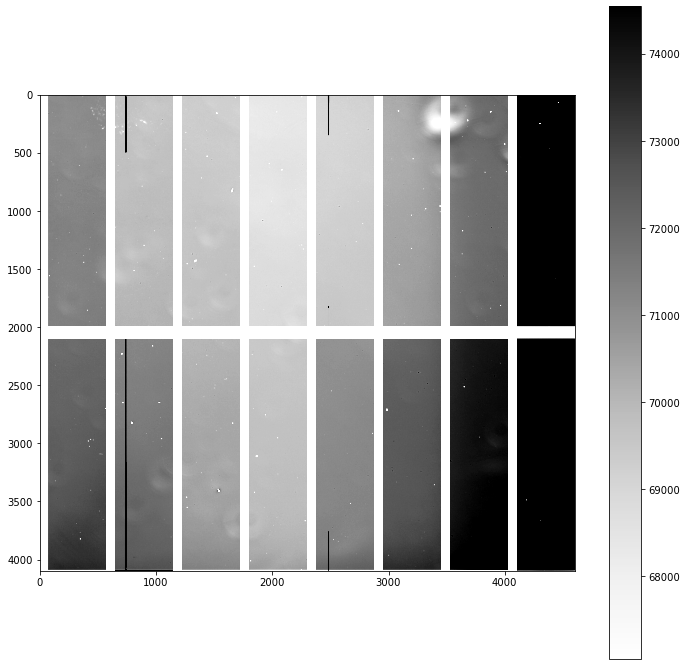

In [33]:
vlow, vhig = get_lims(arr)
print('limits; low, high = %.2f, %.2f'%(vlow,vhig))
if vlow<0.: vlow=1.

import matplotlib.colors as colors
plt.figure(figsize=(12,12))
plt.imshow(arr,vmin=vlow,vmax=vhig,cmap='Greys')

plt.colorbar()

This is a raw image, so I don't know exactly what is the ADU level above the bias. The quickest way to see an image with bias subtracted is trough the quick look collection.

In [77]:
from lsst.daf.persistence import Butler as gen2Butler

expId = 2021021600131
REPO_DIR = '/project/shared/auxTel/rerun/quickLook'
gen2_butler = gen2Butler(REPO_DIR)
exp = gen2_butler.get('quickLookExp', detector=0, expId=expId)

In [78]:
arr = exp.image.array
print(det, arr.min(), arr.max(), arr.mean(), arr.std())

0 -16657.543 120080.9 64056.887 1267.7711


limits; low, high = 62778.86, 65318.51


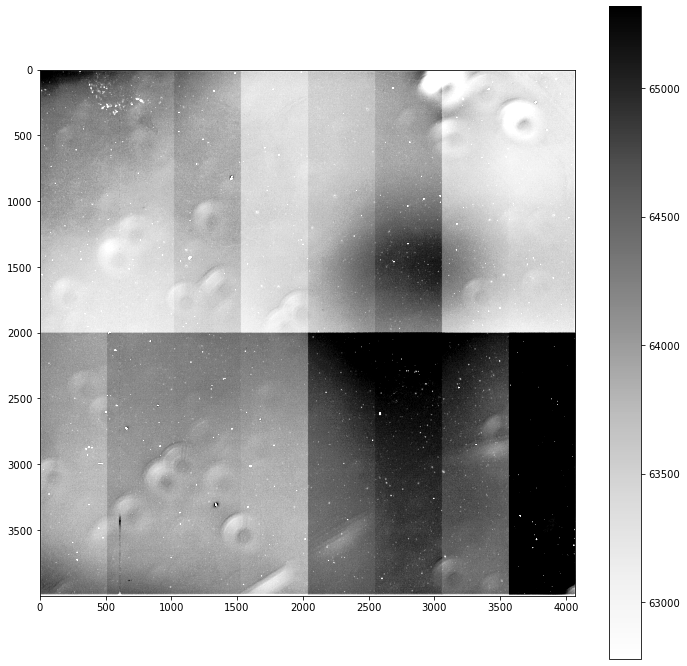

In [79]:
vlow, vhig = get_lims(arr)
print('limits; low, high = %.2f, %.2f'%(vlow,vhig))
if vlow<0.: vlow=1.

import matplotlib.colors as colors
plt.figure(figsize=(12,12))
plt.imshow(arr,vmin=vlow,vmax=vhig,cmap='Greys')

plt.colorbar()

In [76]:
# Gen3 butler
# from lsst.daf.butler import Butler
import lsst.daf.butler as dafButler

# dayObs = '2021-03-23' #ptc?
dayObs = '2021-02-16'
dayObs = int(dayObs.replace('-', ''))

# Instantiate the Gen3 butler
dataPath = "/repo/main"
instrument = "LATISS"
butler = dafButler.Butler(dataPath, 
                          collections=["LATISS/raw/all", "LATISS/calib/unbounded"],
                          instrument=instrument)
exposureList = []
for record in butler.registry.queryDimensionRecords("exposure", where="exposure.day_obs=%d"%dayObs):
    exposureList.append([record.id, record])
exposureList.sort(key=lambda x: x[0])
for [id,record] in exposureList:
    if record.observation_type=='flat':
        print(record.id, record.observation_type, record.exposure_time, record.physical_filter, record.target_name)

2021021600102 flat 2.0 RG610~empty FlatField position
2021021600103 flat 2.0 RG610~empty FlatField position
2021021600104 flat 2.0 RG610~empty FlatField position
2021021600105 flat 2.0 RG610~empty FlatField position
2021021600106 flat 2.0 RG610~empty FlatField position
2021021600107 flat 2.0 RG610~empty FlatField position
2021021600108 flat 2.0 RG610~empty FlatField position
2021021600109 flat 2.0 RG610~empty FlatField position
2021021600110 flat 2.0 RG610~empty FlatField position
2021021600111 flat 2.0 RG610~empty FlatField position
2021021600112 flat 0.2 empty~empty FlatField position
2021021600113 flat 0.2 empty~empty FlatField position
2021021600114 flat 0.4 empty~empty FlatField position
2021021600115 flat 0.4 empty~empty FlatField position
2021021600116 flat 0.6 empty~empty FlatField position
2021021600117 flat 0.6 empty~empty FlatField position
2021021600118 flat 0.8 empty~empty FlatField position
2021021600119 flat 0.8 empty~empty FlatField position
2021021600120 flat 1.0 empty

In [ ]:
from lsst.daf.butler import Butler

repo = "/repo/main"
instrument = "LATISS"
obsDate = 20211104

collection = f"u/jesteves/latiss/ptc_{obsDate}"
print('repo: %s'%repo)
print('collection:%s \n'%collection)

good = []
subbutler = Butler(repo,collections=collection)
subregistry = subbutler.registry
for dtype in subregistry.queryDatasetTypes():
    try:
        datasetRefs = list(subregistry.queryDatasets(datasetType=dtype,collections=collection))
        if len(datasetRefs)>1:
            print(len(datasetRefs), dtype)
            good.append(dtype)
    except:
        print("Error", dtype )

In [ ]:
toto = list(subregistry.queryDatasets(datasetType=good[1],collections=collection))

In [ ]:
for i in range(len(toto)):
    print(toto[i].run)